<a href="https://colab.research.google.com/github/Fuenfgeld/2022TeamADataManagementBC/blob/main/DataManagementBootcamp/Diabetes_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example data analyse for scikit diabetes data

## import required libraries

In [2]:
import sklearn.datasets as ds
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data exploration

Data can be found on kaggle on https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

There are 3 types of input features:

-    Objective: factual information;
-    Examination: results of medical examination;
-    Subjective: information given by the patient.


Features:

-    Age | Objective Feature | age | int (days)
-    Height | Objective Feature | height | int (cm) |
-    Weight | Objective Feature | weight | float (kg) |
-    Gender | Objective Feature | gender | categorical code |
-    Systolic blood pressure | Examination Feature | ap_hi | int |
-    Diastolic blood pressure | Examination Feature | ap_lo | int |
-    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
-    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
-    Smoking | Subjective Feature | smoke | binary |
-    Alcohol intake | Subjective Feature | alco | binary |
-    Physical activity | Subjective Feature | active | binary |
-    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


## data exploration

### simple statistics

In [37]:
df = pd.read_csv("./data/cardio_train.csv", sep = ';', index_col = 0)

In [38]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Konvertiere Alter(Tage) in Alter (Jahre)

In [39]:
df['age'] = np.array(df['age'] / 365.24219 , dtype=int) # mean Gregorian year 365.2425 

In [40]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.803257,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.762462,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


1    45530
2    24470
dtype: int64


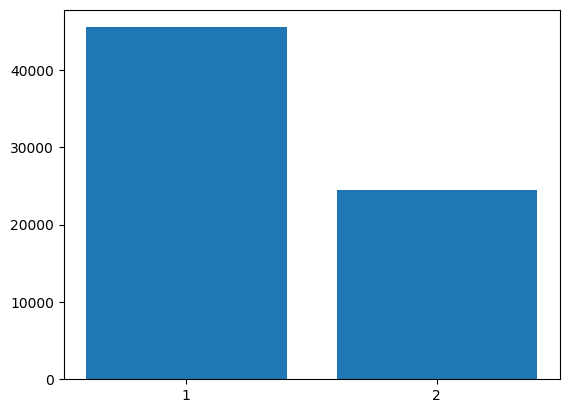

In [29]:
sex_df = pd.Categorical(df['gender'])
sex_df = sex_df.rename_categories(["1","2"]) # dosen't know which is female or male
plt.bar(["1","2"],sex_df.value_counts()) # show the ratio between male/female
print(sex_df.value_counts())
plt.show()

### corelation

In [31]:
df.cov()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,45.789226,-0.073933,-4.528158,5.217518,21.733527,22.471135,0.708935,0.381001,-0.091403,-0.045419,-0.026872,0.805199
gender,-0.073933,0.227374,1.953666,1.066773,0.441021,1.370888,-0.011619,-0.005592,0.045708,0.018389,0.001111,0.001933
height,-4.528158,1.953666,67.406175,34.389774,6.939021,9.517130,-0.280509,-0.087365,0.437534,0.174858,-0.021423,-0.044421
weight,5.217518,1.066773,34.389774,207.237810,68.070202,118.593560,1.388293,0.880318,0.276610,0.217930,-0.096439,1.307573
ap_hi,21.733527,0.441021,6.939021,68.070202,23719.517323,466.912942,2.491125,1.043592,-0.040255,0.048926,-0.002019,4.194919
ap_lo,22.471135,1.370888,9.517130,118.593560,466.912942,35521.894676,3.079477,1.165469,0.277089,0.450694,0.357837,6.193128
cholesterol,0.708935,-0.011619,-0.280509,1.388293,2.491125,3.079477,0.462741,0.175793,0.001997,0.005487,0.002678,0.075218
gluc,0.381001,-0.005592,-0.087365,0.880318,1.043592,1.165469,0.175793,0.327493,-0.000772,0.001452,-0.001539,0.025554
smoke,-0.091403,0.045708,0.437534,0.276610,-0.040255,0.277089,0.001997,-0.000772,0.080363,0.021747,0.002911,-0.002195
alco,-0.045419,0.018389,0.174858,0.217930,0.048926,0.450694,0.005487,0.001452,0.021747,0.050881,0.002282,-0.000827


## Metadata exploration

There are 3 types of input features:

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.
    
Description with UCUM in https://ucum.org/ucum.html#section-Grammar-of-Units-and-Unit-Terms#section-Derived-Unit-Atoms;
Description for 

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) | 
- Weight | Objective Feature | weight | float (kg) |

- Gender | Objective Feature | gender | categorical code | -> 1 - women, 2 - men
- Systolic blood pressure | Examination Feature | ap_hi | int | -> Endconing and norm(80 mmHg) missing 
- Diastolic blood pressure | Examination Feature | ap_lo | int | -> Endconing and norm(120 mmHg) 
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | -> Range missing
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | -> Range missing
- Smoking | Subjective Feature | smoke | binary | SNOMED CODE
- Alcohol intake | Subjective Feature | alco | binary | SNOMED CODE
- Physical activity | Subjective Feature | active | binary | SNOMED CODE
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary | ICD-10

### Metadaten Schema

https://guides.library.yale.edu/rdm_healthsci/metadata_schema

https://fairsharing.org/search?fairsharingRegistry=Standard

- Wer besitzt die Daten? -> Svetlana Ulianova (Owner)
- Woher kommen die Daten? -> Alle Datensatzwerte wurden zum Zeitpunkt der ärztlichen Untersuchung erhoben.
- Zugriffrechte der Daten / Welche Lizenz? -> Public/Unknown
- Wo werden die Daten genutz/geteilt? -> Kaggle 
- Benutzung/Vewendung der Daten? -> Klassifizierung von Herzkrankheiten
- Wann wurden die Daten erstellt/geändert? -> 2019
- Datum der einzelnen Aufnahmen? -> (Hinzufügen?)

https://www.w3.org/TR/hcls-dataset/#metadataguidancenotes

- Title
- Beschreibung
- Daten der Erstellung
- Autor der Daten
- Publisher
- Keywords
- Lizenz
- Sprache
- References

(Identifiers, Änderungen, Dauer/Erhaltung, Statistics)

In [43]:
simple_data_feature = ["age","height","weight","ap_hi","ap_lo","smoke","cardio"]
df_new = df[simple_data_feature]
df_new.head(10)

,age,weight,ap_hi,ap_lo,smoke,cardio
id,,,,,,
0,50,62.0,110,80,0,0
1,55,85.0,140,90,0,1
2,51,64.0,130,70,0,1
3,48,82.0,150,100,0,1
4,47,56.0,100,60,0,0
8,59,67.0,120,80,0,0
9,60,93.0,130,80,0,0
12,61,95.0,130,90,0,1
13,48,71.0,110,70,0,0
